In [1]:
import pandas as pd
import numpy as np
from descriptastorus.descriptors.DescriptorGenerator import MakeGenerator
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, kendalltau

In [2]:
import matplotlib.pyplot as plt

# RF Baseline

## RDKit descriptors (2D)

### MEAN, VAR, MIN, MAX

In [5]:
random_state = 42

generator = MakeGenerator(("RDKit2D",))

mix_data = pd.read_csv("datasets/competition/Mixture_Definitions_smi_Training_set.csv")
smi_cols = [col for col in mix_data.columns if col.startswith("smi")]

smi_data = mix_data[smi_cols]

descr_data = smi_data.map(lambda smi: generator.process(smi)[1:], na_action='ignore')

dr_df = pd.DataFrame()
for i in descr_data.index:
    mean_descr = np.stack(descr_data.iloc[i].dropna()).mean(axis=0).T
    var_descr = np.stack(descr_data.iloc[i].dropna()).var(axis=0)
    max_descr = np.stack(descr_data.iloc[i].dropna()).max(axis=0)
    min_descr = np.stack(descr_data.iloc[i].dropna()).min(axis=0)

    final_descr = np.concatenate([mean_descr, var_descr, max_descr, min_descr])

    tmp_df = pd.DataFrame(final_descr).T
    tmp_df["Mixture Label"] = mix_data.iloc[i]["Mixture Label"]
    tmp_df["Dataset"] = mix_data.iloc[i]["Dataset"]
    dr_df = pd.concat([dr_df, tmp_df])

mix_label = pd.read_csv("datasets/competition/TrainingData_mixturedist.csv")

mix_vec = []
for i in mix_label.index:
    m1 = dr_df.loc[(dr_df["Dataset"] == mix_label.iloc[i]["Dataset"]) & (dr_df["Mixture Label"] == mix_label.iloc[i]["Mixture 1"])].drop(columns=["Dataset", "Mixture Label"]).values
    m2 = dr_df.loc[(dr_df["Dataset"] == mix_label.iloc[i]["Dataset"]) & (dr_df["Mixture Label"] == mix_label.iloc[i]["Mixture 2"])].drop(columns=["Dataset", "Mixture Label"]).values
    mix_vec.append(np.concatenate((m1, m2)))

mix_label["mix_vec"] = mix_vec

X = np.stack(mix_label["mix_vec"].values)
X = X.reshape((X.shape[0], X.shape[1]*X.shape[2]))

y = np.array(mix_label["Experimental Values"].values)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestRegressor(random_state=random_state, max_features=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

prs = pearsonr(y_test, y_pred)
print(f'Pearson coefficient: {prs}')

ket = kendalltau(y_test, y_pred)
print(f'Kendall Tau: {ket}')

[10:46:02] WARNING: not removing hydrogen atom without neighbors
[10:46:02] WARNING: not removing hydrogen atom without neighbors
[10:46:03] WARNING: not removing hydrogen atom without neighbors
[10:46:03] WARNING: not removing hydrogen atom without neighbors
[10:46:03] WARNING: not removing hydrogen atom without neighbors
[10:46:03] WARNING: not removing hydrogen atom without neighbors
[10:46:03] WARNING: not removing hydrogen atom without neighbors
[10:46:03] WARNING: not removing hydrogen atom without neighbors
[10:46:03] WARNING: not removing hydrogen atom without neighbors
[10:46:03] WARNING: not removing hydrogen atom without neighbors
[10:46:03] WARNING: not removing hydrogen atom without neighbors
[10:46:03] WARNING: not removing hydrogen atom without neighbors
[10:46:04] WARNING: not removing hydrogen atom without neighbors
[10:46:04] WARNING: not removing hydrogen atom without neighbors
[10:46:04] WARNING: not removing hydrogen atom without neighbors
[10:46:04] WARNING: not r

Mean Squared Error: 0.020006944814686043
R-squared: 0.16100417679211365
Pearson coefficient: PearsonRResult(statistic=0.43639730869098, pvalue=5.657477563777011e-06)
Kendall Tau: SignificanceResult(statistic=0.27729763923222994, pvalue=4.8283189373594834e-05)


(0.169231, 1.0107)

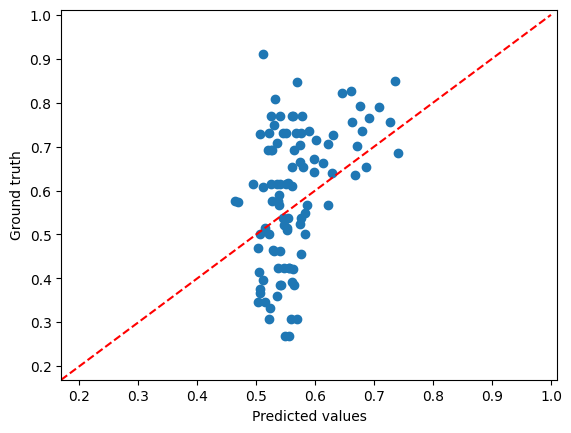

In [6]:
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted values')
plt.ylabel('Ground truth')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim(min(y_pred.min(), y_test.min()) - 0.1, max(y_pred.max(), y_test.max()) + 0.1)
plt.ylim(min(y_pred.min(), y_test.min()) - 0.1, max(y_pred.max(), y_test.max()) + 0.1)

### MEAN

In [7]:
random_state = 42

generator = MakeGenerator(("RDKit2D",))

mix_data = pd.read_csv("datasets/competition/Mixture_Definitions_smi_Training_set.csv")
smi_cols = [col for col in mix_data.columns if col.startswith("smi")]

smi_data = mix_data[smi_cols]

descr_data = smi_data.map(lambda smi: generator.process(smi)[1:], na_action='ignore')

dr_df = pd.DataFrame()
for i in descr_data.index:
    final_descr = np.stack(descr_data.iloc[i].dropna()).mean(axis=0).T

    tmp_df = pd.DataFrame(final_descr).T
    tmp_df["Mixture Label"] = mix_data.iloc[i]["Mixture Label"]
    tmp_df["Dataset"] = mix_data.iloc[i]["Dataset"]
    dr_df = pd.concat([dr_df, tmp_df])

mix_label = pd.read_csv("datasets/competition/TrainingData_mixturedist.csv")

mix_vec = []
for i in mix_label.index:
    m1 = dr_df.loc[(dr_df["Dataset"] == mix_label.iloc[i]["Dataset"]) & (dr_df["Mixture Label"] == mix_label.iloc[i]["Mixture 1"])].drop(columns=["Dataset", "Mixture Label"]).values
    m2 = dr_df.loc[(dr_df["Dataset"] == mix_label.iloc[i]["Dataset"]) & (dr_df["Mixture Label"] == mix_label.iloc[i]["Mixture 2"])].drop(columns=["Dataset", "Mixture Label"]).values
    mix_vec.append(np.concatenate((m1, m2)))

mix_label["mix_vec"] = mix_vec

X = np.stack(mix_label["mix_vec"].values)
X = X.reshape((X.shape[0], X.shape[1]*X.shape[2]))

y = np.array(mix_label["Experimental Values"].values)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestRegressor(random_state=random_state, max_features=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

prs = pearsonr(y_test, y_pred)
print(f'Pearson coefficient: {prs}')

ket = kendalltau(y_test, y_pred)
print(f'Kendall Tau: {ket}')

[10:46:54] WARNING: not removing hydrogen atom without neighbors
[10:46:54] WARNING: not removing hydrogen atom without neighbors
[10:46:55] WARNING: not removing hydrogen atom without neighbors
[10:46:55] WARNING: not removing hydrogen atom without neighbors
[10:46:55] WARNING: not removing hydrogen atom without neighbors
[10:46:55] WARNING: not removing hydrogen atom without neighbors
[10:46:55] WARNING: not removing hydrogen atom without neighbors
[10:46:55] WARNING: not removing hydrogen atom without neighbors
[10:46:55] WARNING: not removing hydrogen atom without neighbors
[10:46:55] WARNING: not removing hydrogen atom without neighbors
[10:46:55] WARNING: not removing hydrogen atom without neighbors
[10:46:55] WARNING: not removing hydrogen atom without neighbors
[10:46:56] WARNING: not removing hydrogen atom without neighbors
[10:46:56] WARNING: not removing hydrogen atom without neighbors
[10:46:56] WARNING: not removing hydrogen atom without neighbors
[10:46:56] WARNING: not r

Mean Squared Error: 0.018374252103898977
R-squared: 0.24299452626751028
Pearson coefficient: PearsonRResult(statistic=0.5311472151527599, pvalue=1.306735544302625e-08)
Kendall Tau: SignificanceResult(statistic=0.36735186383227697, pvalue=7.080104882221584e-08)


(0.092308, 0.92692308)

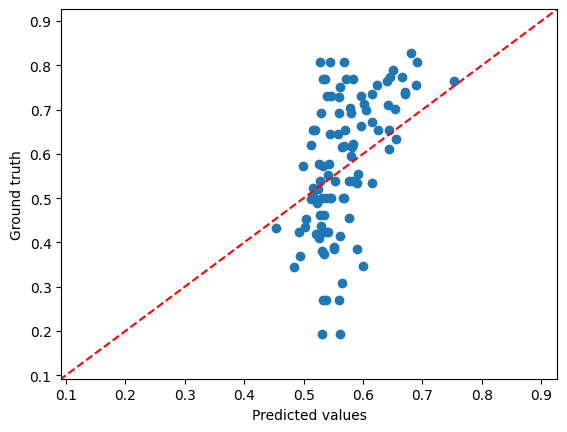

In [8]:
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted values')
plt.ylabel('Ground truth')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim(min(y_pred.min(), y_test.min()) - 0.1, max(y_pred.max(), y_test.max()) + 0.1)
plt.ylim(min(y_pred.min(), y_test.min()) - 0.1, max(y_pred.max(), y_test.max()) + 0.1)

## Dragon descriptors

### MEAN, VAR, MIN, MAX

In [9]:
dragon_descriptors = pd.read_csv("datasets/competition/Dragon_Descriptors.csv")
mix_data = pd.read_csv("datasets/competition/Mixure_Definitions_Training_set.csv")

dd_var = pd.DataFrame()
for i in mix_data.index:
    cids = [mix_data.iloc[i][col] for col in mix_data.columns if col.startswith("CID") and mix_data.iloc[i][col] != 0]
    tmp_df = pd.DataFrame(dragon_descriptors.loc[dragon_descriptors["CID"].isin(cids)].drop(columns=["CID"]).var()).T
    tmp_df = tmp_df.rename(columns={col: f"{col}_var" for col in tmp_df.columns})
    tmp_df["Mixture Label"] = mix_data.iloc[i]["Mixture Label"]
    tmp_df["Dataset"] = mix_data.iloc[i]["Dataset"]
    dd_var = pd.concat([dd_var, tmp_df])

dd_max = pd.DataFrame()
for i in mix_data.index:
    cids = [mix_data.iloc[i][col] for col in mix_data.columns if col.startswith("CID") and mix_data.iloc[i][col] != 0]
    tmp_df = pd.DataFrame(dragon_descriptors.loc[dragon_descriptors["CID"].isin(cids)].drop(columns=["CID"]).max()).T
    tmp_df = tmp_df.rename(columns={col: f"{col}_max" for col in tmp_df.columns})
    tmp_df["Mixture Label"] = mix_data.iloc[i]["Mixture Label"]
    tmp_df["Dataset"] = mix_data.iloc[i]["Dataset"]
    dd_max = pd.concat([dd_max, tmp_df])

dd_min = pd.DataFrame()
for i in mix_data.index:
    cids = [mix_data.iloc[i][col] for col in mix_data.columns if col.startswith("CID") and mix_data.iloc[i][col] != 0]
    tmp_df = pd.DataFrame(dragon_descriptors.loc[dragon_descriptors["CID"].isin(cids)].drop(columns=["CID"]).min()).T
    tmp_df = tmp_df.rename(columns={col: f"{col}_min" for col in tmp_df.columns})
    tmp_df["Mixture Label"] = mix_data.iloc[i]["Mixture Label"]
    tmp_df["Dataset"] = mix_data.iloc[i]["Dataset"]
    dd_min = pd.concat([dd_min, tmp_df])

dd_avg = pd.DataFrame()
for i in mix_data.index:
    cids = [mix_data.iloc[i][col] for col in mix_data.columns if col.startswith("CID") and mix_data.iloc[i][col] != 0]
    tmp_df = pd.DataFrame(dragon_descriptors.loc[dragon_descriptors["CID"].isin(cids)].drop(columns=["CID"]).mean()).T
    tmp_df = tmp_df.rename(columns={col: f"{col}_avg" for col in tmp_df.columns})
    tmp_df["Mixture Label"] = mix_data.iloc[i]["Mixture Label"]
    tmp_df["Dataset"] = mix_data.iloc[i]["Dataset"]
    dd_avg = pd.concat([dd_avg, tmp_df])

dragon_mix_avg = mix_data[["Dataset", "Mixture Label"]]
dragon_mix_avg = dragon_mix_avg.merge(dd_avg)
dragon_mix_avg = dragon_mix_avg.merge(dd_min)
dragon_mix_avg = dragon_mix_avg.merge(dd_max)
dragon_mix_avg = dragon_mix_avg.merge(dd_var)

mix_label = pd.read_csv("datasets/competition/TrainingData_mixturedist.csv")

mix_vec = []
for i in mix_label.index:
    m1 = dragon_mix_avg.loc[(dragon_mix_avg["Dataset"] == mix_label.iloc[i]["Dataset"]) & (dragon_mix_avg["Mixture Label"] == mix_label.iloc[i]["Mixture 1"])].drop(columns=["Dataset", "Mixture Label"]).values
    m2 = dragon_mix_avg.loc[(dragon_mix_avg["Dataset"] == mix_label.iloc[i]["Dataset"]) & (dragon_mix_avg["Mixture Label"] == mix_label.iloc[i]["Mixture 2"])].drop(columns=["Dataset", "Mixture Label"]).values
    mix_vec.append(np.concatenate((m1, m2)))

mix_label["mix_vec"] = mix_vec

X = np.stack(mix_label["mix_vec"].values)
X = X.reshape((X.shape[0], X.shape[1]*X.shape[2]))

y = np.array(mix_label["Experimental Values"].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestRegressor(random_state=42, max_features=None)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

prs = pearsonr(y_test, y_pred)
print(f'Pearson coefficient: {prs}')

ket = kendalltau(y_test, y_pred)
print(f'Kendall Tau: {ket}')

Mean Squared Error: 0.024038099184798226
R-squared: 0.06425040127883375
Pearson coefficient: PearsonRResult(statistic=0.31727116736365574, pvalue=0.001298336628745879)
Kendall Tau: SignificanceResult(statistic=0.17822767198954542, pvalue=0.009260254929719406)


(0.053846000000000005, 1.023077)

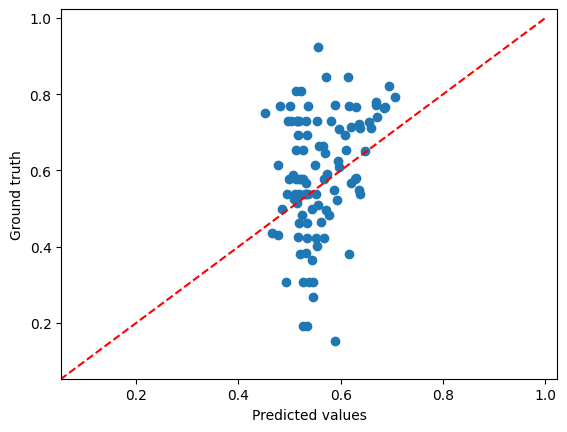

In [10]:
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted values')
plt.ylabel('Ground truth')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim(min(y_pred.min(), y_test.min()) - 0.1, max(y_pred.max(), y_test.max()) + 0.1)
plt.ylim(min(y_pred.min(), y_test.min()) - 0.1, max(y_pred.max(), y_test.max()) + 0.1)

### MEAN

In [12]:
dragon_descriptors = pd.read_csv("datasets/competition/Dragon_Descriptors.csv")
mix_data = pd.read_csv("datasets/competition/Mixure_Definitions_Training_set.csv")


dd_avg = pd.DataFrame()
for i in mix_data.index:
    cids = [mix_data.iloc[i][col] for col in mix_data.columns if col.startswith("CID") and mix_data.iloc[i][col] != 0]
    tmp_df = pd.DataFrame(dragon_descriptors.loc[dragon_descriptors["CID"].isin(cids)].drop(columns=["CID"]).mean()).T
    tmp_df = tmp_df.rename(columns={col: f"{col}_avg" for col in tmp_df.columns})
    tmp_df["Mixture Label"] = mix_data.iloc[i]["Mixture Label"]
    tmp_df["Dataset"] = mix_data.iloc[i]["Dataset"]
    dd_avg = pd.concat([dd_avg, tmp_df])

dragon_mix_avg = mix_data[["Dataset", "Mixture Label"]]
dragon_mix_avg = dragon_mix_avg.merge(dd_avg)


mix_label = pd.read_csv("datasets/competition/TrainingData_mixturedist.csv")

mix_vec = []
for i in mix_label.index:
    m1 = dragon_mix_avg.loc[(dragon_mix_avg["Dataset"] == mix_label.iloc[i]["Dataset"]) & (dragon_mix_avg["Mixture Label"] == mix_label.iloc[i]["Mixture 1"])].drop(columns=["Dataset", "Mixture Label"]).values
    m2 = dragon_mix_avg.loc[(dragon_mix_avg["Dataset"] == mix_label.iloc[i]["Dataset"]) & (dragon_mix_avg["Mixture Label"] == mix_label.iloc[i]["Mixture 2"])].drop(columns=["Dataset", "Mixture Label"]).values
    mix_vec.append(np.concatenate((m1, m2)))

mix_label["mix_vec"] = mix_vec

X = np.stack(mix_label["mix_vec"].values)
X = X.reshape((X.shape[0], X.shape[1]*X.shape[2]))

y = np.array(mix_label["Experimental Values"].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestRegressor(random_state=42, max_features=None)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

prs = pearsonr(y_test, y_pred)
print(f'Pearson coefficient: {prs}')

ket = kendalltau(y_test, y_pred)
print(f'Kendall Tau: {ket}')

Mean Squared Error: 0.023036353924123364
R-squared: 0.15615462233463562
Pearson coefficient: PearsonRResult(statistic=0.39589622600304264, pvalue=4.560653579468368e-05)
Kendall Tau: SignificanceResult(statistic=0.2590717336009804, pvalue=0.00015040779353826206)


(-0.023077, 0.9461539999999999)

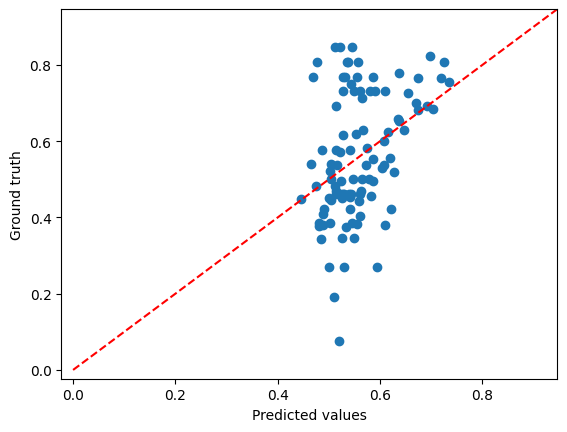

In [13]:
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted values')
plt.ylabel('Ground truth')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim(min(y_pred.min(), y_test.min()) - 0.1, max(y_pred.max(), y_test.max()) + 0.1)
plt.ylim(min(y_pred.min(), y_test.min()) - 0.1, max(y_pred.max(), y_test.max()) + 0.1)

# XGBoost Baseline

## RDKit descriptors (2D)

### MEAN, VAR, MIN, MAX

In [14]:
random_state = 42

generator = MakeGenerator(("RDKit2D",))

mix_data = pd.read_csv("datasets/competition/Mixture_Definitions_smi_Training_set.csv")
smi_cols = [col for col in mix_data.columns if col.startswith("smi")]

smi_data = mix_data[smi_cols]

descr_data = smi_data.map(lambda smi: generator.process(smi)[1:], na_action='ignore')

dr_df = pd.DataFrame()
for i in descr_data.index:
    mean_descr = np.stack(descr_data.iloc[i].dropna()).mean(axis=0).T
    var_descr = np.stack(descr_data.iloc[i].dropna()).var(axis=0)
    max_descr = np.stack(descr_data.iloc[i].dropna()).max(axis=0)
    min_descr = np.stack(descr_data.iloc[i].dropna()).min(axis=0)

    final_descr = np.concatenate([mean_descr, var_descr, max_descr, min_descr])

    tmp_df = pd.DataFrame(final_descr).T
    tmp_df["Mixture Label"] = mix_data.iloc[i]["Mixture Label"]
    tmp_df["Dataset"] = mix_data.iloc[i]["Dataset"]
    dr_df = pd.concat([dr_df, tmp_df])

mix_label = pd.read_csv("datasets/competition/TrainingData_mixturedist.csv")

mix_vec = []
for i in mix_label.index:
    m1 = dr_df.loc[(dr_df["Dataset"] == mix_label.iloc[i]["Dataset"]) & (dr_df["Mixture Label"] == mix_label.iloc[i]["Mixture 1"])].drop(columns=["Dataset", "Mixture Label"]).values
    m2 = dr_df.loc[(dr_df["Dataset"] == mix_label.iloc[i]["Dataset"]) & (dr_df["Mixture Label"] == mix_label.iloc[i]["Mixture 2"])].drop(columns=["Dataset", "Mixture Label"]).values
    mix_vec.append(np.concatenate((m1, m2)))

mix_label["mix_vec"] = mix_vec

X = np.stack(mix_label["mix_vec"].values)
X = X.reshape((X.shape[0], X.shape[1]*X.shape[2]))

y = np.array(mix_label["Experimental Values"].values)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

xgbr = XGBRegressor(random_state=random_state)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

prs = pearsonr(y_test, y_pred)
print(f'Pearson coefficient: {prs}')

ket = kendalltau(y_test, y_pred)
print(f'Kendall Tau: {ket}')

[10:53:08] WARNING: not removing hydrogen atom without neighbors
[10:53:08] WARNING: not removing hydrogen atom without neighbors
[10:53:08] WARNING: not removing hydrogen atom without neighbors
[10:53:08] WARNING: not removing hydrogen atom without neighbors
[10:53:08] WARNING: not removing hydrogen atom without neighbors
[10:53:08] WARNING: not removing hydrogen atom without neighbors
[10:53:09] WARNING: not removing hydrogen atom without neighbors
[10:53:09] WARNING: not removing hydrogen atom without neighbors
[10:53:09] WARNING: not removing hydrogen atom without neighbors
[10:53:09] WARNING: not removing hydrogen atom without neighbors
[10:53:09] WARNING: not removing hydrogen atom without neighbors
[10:53:09] WARNING: not removing hydrogen atom without neighbors
[10:53:09] WARNING: not removing hydrogen atom without neighbors
[10:53:09] WARNING: not removing hydrogen atom without neighbors
[10:53:09] WARNING: not removing hydrogen atom without neighbors
[10:53:09] WARNING: not r

Mean Squared Error: 0.01726554403897011
R-squared: 0.2682339648630756
Pearson coefficient: PearsonRResult(statistic=0.5286486027473726, pvalue=1.5720156638907262e-08)
Kendall Tau: SignificanceResult(statistic=0.40690429279081436, pvalue=2.3312460903001395e-09)


(0.053846000000000005, 1.00104167)

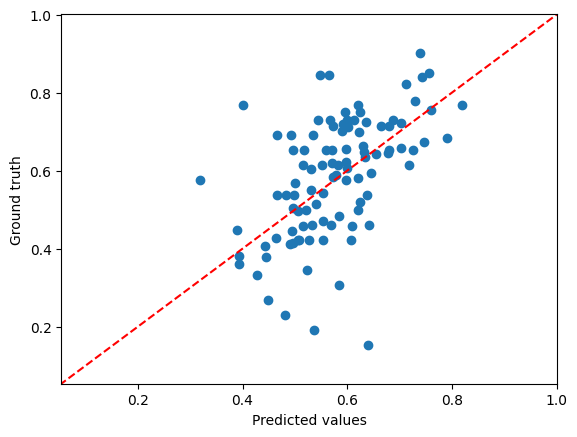

In [15]:
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted values')
plt.ylabel('Ground truth')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim(min(y_pred.min(), y_test.min()) - 0.1, max(y_pred.max(), y_test.max()) + 0.1)
plt.ylim(min(y_pred.min(), y_test.min()) - 0.1, max(y_pred.max(), y_test.max()) + 0.1)

### MEAN

In [16]:
random_state = 42

generator = MakeGenerator(("RDKit2D",))

mix_data = pd.read_csv("datasets/competition/Mixture_Definitions_smi_Training_set.csv")
smi_cols = [col for col in mix_data.columns if col.startswith("smi")]

smi_data = mix_data[smi_cols]

descr_data = smi_data.map(lambda smi: generator.process(smi)[1:], na_action='ignore')

dr_df = pd.DataFrame()
for i in descr_data.index:
    final_descr = np.stack(descr_data.iloc[i].dropna()).mean(axis=0).T

    tmp_df = pd.DataFrame(final_descr).T
    tmp_df["Mixture Label"] = mix_data.iloc[i]["Mixture Label"]
    tmp_df["Dataset"] = mix_data.iloc[i]["Dataset"]
    dr_df = pd.concat([dr_df, tmp_df])

mix_label = pd.read_csv("datasets/competition/TrainingData_mixturedist.csv")

mix_vec = []
for i in mix_label.index:
    m1 = dr_df.loc[(dr_df["Dataset"] == mix_label.iloc[i]["Dataset"]) & (dr_df["Mixture Label"] == mix_label.iloc[i]["Mixture 1"])].drop(columns=["Dataset", "Mixture Label"]).values
    m2 = dr_df.loc[(dr_df["Dataset"] == mix_label.iloc[i]["Dataset"]) & (dr_df["Mixture Label"] == mix_label.iloc[i]["Mixture 2"])].drop(columns=["Dataset", "Mixture Label"]).values
    mix_vec.append(np.concatenate((m1, m2)))

mix_label["mix_vec"] = mix_vec

X = np.stack(mix_label["mix_vec"].values)
X = X.reshape((X.shape[0], X.shape[1]*X.shape[2]))

y = np.array(mix_label["Experimental Values"].values)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

xgbr = XGBRegressor(random_state=random_state)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

prs = pearsonr(y_test, y_pred)
print(f'Pearson coefficient: {prs}')

ket = kendalltau(y_test, y_pred)
print(f'Kendall Tau: {ket}')

[10:54:01] WARNING: not removing hydrogen atom without neighbors
[10:54:01] WARNING: not removing hydrogen atom without neighbors
[10:54:02] WARNING: not removing hydrogen atom without neighbors
[10:54:02] WARNING: not removing hydrogen atom without neighbors
[10:54:02] WARNING: not removing hydrogen atom without neighbors
[10:54:02] WARNING: not removing hydrogen atom without neighbors
[10:54:02] WARNING: not removing hydrogen atom without neighbors
[10:54:02] WARNING: not removing hydrogen atom without neighbors
[10:54:02] WARNING: not removing hydrogen atom without neighbors
[10:54:02] WARNING: not removing hydrogen atom without neighbors
[10:54:03] WARNING: not removing hydrogen atom without neighbors
[10:54:03] WARNING: not removing hydrogen atom without neighbors
[10:54:03] WARNING: not removing hydrogen atom without neighbors
[10:54:03] WARNING: not removing hydrogen atom without neighbors
[10:54:03] WARNING: not removing hydrogen atom without neighbors
[10:54:03] WARNING: not r

Mean Squared Error: 0.0221581600267931
R-squared: 0.07982082870969842
Pearson coefficient: PearsonRResult(statistic=0.38224917025768707, pvalue=8.688914496787992e-05)
Kendall Tau: SignificanceResult(statistic=0.26031042858803277, pvalue=0.0001384244439564458)


(0.053846000000000005, 1.00104167)

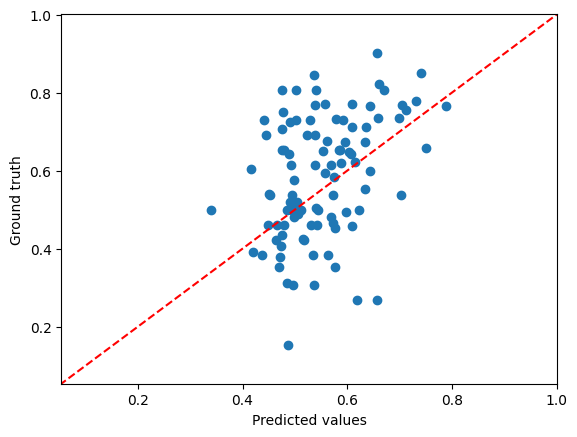

In [17]:
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted values')
plt.ylabel('Ground truth')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim(min(y_pred.min(), y_test.min()) - 0.1, max(y_pred.max(), y_test.max()) + 0.1)
plt.ylim(min(y_pred.min(), y_test.min()) - 0.1, max(y_pred.max(), y_test.max()) + 0.1)

## Dragon descriptors

### MEAN, VAR, MIN, MAX

In [18]:
dragon_descriptors = pd.read_csv("datasets/competition/Dragon_Descriptors.csv")
mix_data = pd.read_csv("datasets/competition/Mixure_Definitions_Training_set.csv")

dd_var = pd.DataFrame()
for i in mix_data.index:
    cids = [mix_data.iloc[i][col] for col in mix_data.columns if col.startswith("CID") and mix_data.iloc[i][col] != 0]
    tmp_df = pd.DataFrame(dragon_descriptors.loc[dragon_descriptors["CID"].isin(cids)].drop(columns=["CID"]).var()).T
    tmp_df = tmp_df.rename(columns={col: f"{col}_var" for col in tmp_df.columns})
    tmp_df["Mixture Label"] = mix_data.iloc[i]["Mixture Label"]
    tmp_df["Dataset"] = mix_data.iloc[i]["Dataset"]
    dd_var = pd.concat([dd_var, tmp_df])

dd_max = pd.DataFrame()
for i in mix_data.index:
    cids = [mix_data.iloc[i][col] for col in mix_data.columns if col.startswith("CID") and mix_data.iloc[i][col] != 0]
    tmp_df = pd.DataFrame(dragon_descriptors.loc[dragon_descriptors["CID"].isin(cids)].drop(columns=["CID"]).max()).T
    tmp_df = tmp_df.rename(columns={col: f"{col}_max" for col in tmp_df.columns})
    tmp_df["Mixture Label"] = mix_data.iloc[i]["Mixture Label"]
    tmp_df["Dataset"] = mix_data.iloc[i]["Dataset"]
    dd_max = pd.concat([dd_max, tmp_df])

dd_min = pd.DataFrame()
for i in mix_data.index:
    cids = [mix_data.iloc[i][col] for col in mix_data.columns if col.startswith("CID") and mix_data.iloc[i][col] != 0]
    tmp_df = pd.DataFrame(dragon_descriptors.loc[dragon_descriptors["CID"].isin(cids)].drop(columns=["CID"]).min()).T
    tmp_df = tmp_df.rename(columns={col: f"{col}_min" for col in tmp_df.columns})
    tmp_df["Mixture Label"] = mix_data.iloc[i]["Mixture Label"]
    tmp_df["Dataset"] = mix_data.iloc[i]["Dataset"]
    dd_min = pd.concat([dd_min, tmp_df])

dd_avg = pd.DataFrame()
for i in mix_data.index:
    cids = [mix_data.iloc[i][col] for col in mix_data.columns if col.startswith("CID") and mix_data.iloc[i][col] != 0]
    tmp_df = pd.DataFrame(dragon_descriptors.loc[dragon_descriptors["CID"].isin(cids)].drop(columns=["CID"]).mean()).T
    tmp_df = tmp_df.rename(columns={col: f"{col}_avg" for col in tmp_df.columns})
    tmp_df["Mixture Label"] = mix_data.iloc[i]["Mixture Label"]
    tmp_df["Dataset"] = mix_data.iloc[i]["Dataset"]
    dd_avg = pd.concat([dd_avg, tmp_df])

dragon_mix_avg = mix_data[["Dataset", "Mixture Label"]]
dragon_mix_avg = dragon_mix_avg.merge(dd_avg)
dragon_mix_avg = dragon_mix_avg.merge(dd_min)
dragon_mix_avg = dragon_mix_avg.merge(dd_max)
dragon_mix_avg = dragon_mix_avg.merge(dd_var)

mix_label = pd.read_csv("datasets/competition/TrainingData_mixturedist.csv")

mix_vec = []
for i in mix_label.index:
    m1 = dragon_mix_avg.loc[(dragon_mix_avg["Dataset"] == mix_label.iloc[i]["Dataset"]) & (dragon_mix_avg["Mixture Label"] == mix_label.iloc[i]["Mixture 1"])].drop(columns=["Dataset", "Mixture Label"]).values
    m2 = dragon_mix_avg.loc[(dragon_mix_avg["Dataset"] == mix_label.iloc[i]["Dataset"]) & (dragon_mix_avg["Mixture Label"] == mix_label.iloc[i]["Mixture 2"])].drop(columns=["Dataset", "Mixture Label"]).values
    mix_vec.append(np.concatenate((m1, m2)))

mix_label["mix_vec"] = mix_vec

X = np.stack(mix_label["mix_vec"].values)
X = X.reshape((X.shape[0], X.shape[1]*X.shape[2]))

y = np.array(mix_label["Experimental Values"].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


xgbr = XGBRegressor(random_state=random_state)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

prs = pearsonr(y_test, y_pred)
print(f'Pearson coefficient: {prs}')

ket = kendalltau(y_test, y_pred)
print(f'Kendall Tau: {ket}')

Mean Squared Error: 0.019142055930166955
R-squared: 0.216402850063672
Pearson coefficient: PearsonRResult(statistic=0.5000305049265673, pvalue=1.1780747191681668e-07)
Kendall Tau: SignificanceResult(statistic=0.34595962996789725, pvalue=4.075973052838248e-07)


(0.169231, 0.984615)

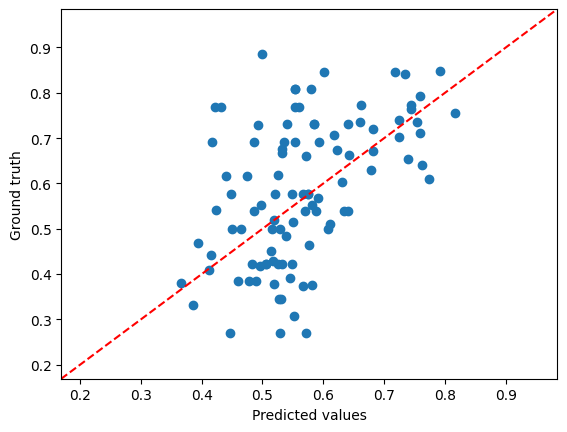

In [19]:
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted values')
plt.ylabel('Ground truth')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim(min(y_pred.min(), y_test.min()) - 0.1, max(y_pred.max(), y_test.max()) + 0.1)
plt.ylim(min(y_pred.min(), y_test.min()) - 0.1, max(y_pred.max(), y_test.max()) + 0.1)

### MEAN

In [20]:
dragon_descriptors = pd.read_csv("datasets/competition/Dragon_Descriptors.csv")
mix_data = pd.read_csv("datasets/competition/Mixure_Definitions_Training_set.csv")


dd_avg = pd.DataFrame()
for i in mix_data.index:
    cids = [mix_data.iloc[i][col] for col in mix_data.columns if col.startswith("CID") and mix_data.iloc[i][col] != 0]
    tmp_df = pd.DataFrame(dragon_descriptors.loc[dragon_descriptors["CID"].isin(cids)].drop(columns=["CID"]).mean()).T
    tmp_df = tmp_df.rename(columns={col: f"{col}_avg" for col in tmp_df.columns})
    tmp_df["Mixture Label"] = mix_data.iloc[i]["Mixture Label"]
    tmp_df["Dataset"] = mix_data.iloc[i]["Dataset"]
    dd_avg = pd.concat([dd_avg, tmp_df])

dragon_mix_avg = mix_data[["Dataset", "Mixture Label"]]
dragon_mix_avg = dragon_mix_avg.merge(dd_avg)


mix_label = pd.read_csv("datasets/competition/TrainingData_mixturedist.csv")

mix_vec = []
for i in mix_label.index:
    m1 = dragon_mix_avg.loc[(dragon_mix_avg["Dataset"] == mix_label.iloc[i]["Dataset"]) & (dragon_mix_avg["Mixture Label"] == mix_label.iloc[i]["Mixture 1"])].drop(columns=["Dataset", "Mixture Label"]).values
    m2 = dragon_mix_avg.loc[(dragon_mix_avg["Dataset"] == mix_label.iloc[i]["Dataset"]) & (dragon_mix_avg["Mixture Label"] == mix_label.iloc[i]["Mixture 2"])].drop(columns=["Dataset", "Mixture Label"]).values
    mix_vec.append(np.concatenate((m1, m2)))

mix_label["mix_vec"] = mix_vec

X = np.stack(mix_label["mix_vec"].values)
X = X.reshape((X.shape[0], X.shape[1]*X.shape[2]))

y = np.array(mix_label["Experimental Values"].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


xgbr = XGBRegressor(random_state=random_state)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

prs = pearsonr(y_test, y_pred)
print(f'Pearson coefficient: {prs}')

ket = kendalltau(y_test, y_pred)
print(f'Kendall Tau: {ket}')

Mean Squared Error: 0.022187341261762666
R-squared: 0.05011253853800868
Pearson coefficient: PearsonRResult(statistic=0.34377473086099536, pvalue=0.0004619656982413392)
Kendall Tau: SignificanceResult(statistic=0.24223139583002645, pvalue=0.00038323941305651787)


(0.092308, 0.984615)

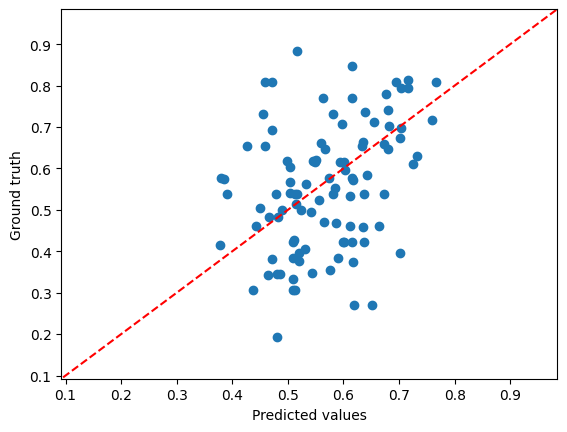

In [21]:
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted values')
plt.ylabel('Ground truth')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim(min(y_pred.min(), y_test.min()) - 0.1, max(y_pred.max(), y_test.max()) + 0.1)
plt.ylim(min(y_pred.min(), y_test.min()) - 0.1, max(y_pred.max(), y_test.max()) + 0.1)